In [ ]:
#@title

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# load data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

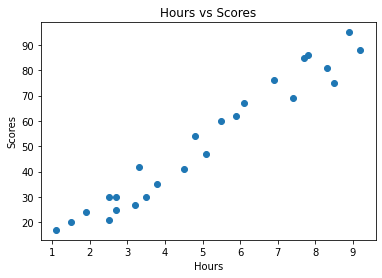

In [ ]:
# plotting data on scatterplot
plt.scatter(x=data['Hours'], y=data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()



preprocessing

In [ ]:
X = data[['Hours']].values
y = data[['Scores']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, random_state=42)

modeling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_, model.coef_

(array([2.82689235]), array([[9.68207815]]))

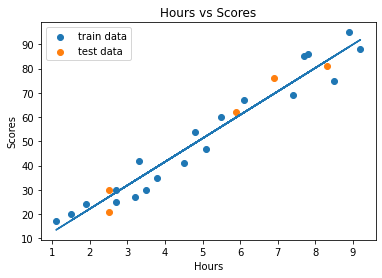

In [ ]:
# defining regression line
line = model.coef_*X+model.intercept_

# plotting for the test data
plt.scatter(X_train, y_train, label='train data')
plt.scatter(X_test, y_test, label='test data')
plt.plot(X, line)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

making prediction

In [ ]:
y_pred = model.predict(X_test)
# comparing actual vs predicted
pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153



Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=y_test, y_pred=y_pred)

18.943211722315272

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

3.9207511902099244

predict with own data

In [ ]:
import ipywidgets as widgets


In [ ]:
def displayData(hours):
    #hours = text.value
    print('No. of Hours: %.1f'%(hours))
    pred = model.predict([[hours]])
    print('Predicted Score: %.4f'%(pred))

In [ ]:
text = widgets.FloatText(description='Enter Hours')
button = widgets.Button(description='Submit')

display(text)
display(button)

tempFunc = lambda t: displayData(text.value)
button.on_click(tempFunc)

FloatText(value=0.0, description='Enter Hours')

Button(description='Submit', style=ButtonStyle())

No. of Hours: 10.0
Predicted Score: 99.6477
